# Chapter 4: Quantum Annealing Strategy

Introduction to quantum annealing using D-Wave systems and QUBO formulations.

---

**Prerequisites:**
- Python 3.8+
- Qiskit 2.1.2
- See `Chapter02_Software.ipynb` for installation instructions


In [1]:
# Setup and imports for D-Wave
import numpy as np
import matplotlib.pyplot as plt
import neal
from pyqubo import Binary, Array
import networkx as nx

from Chapter03_TrussOptimization_functions import TrussFEM
from Chapter04_QuantumAnnealing_functions import TrussQUBOOptimizer, QUBOBoxSolverClass
print('Setup complete!')

Setup complete!


## Import Modules for Solving QUBO

In [2]:
from pyqubo import Binary, Array,Placeholder
from dimod.reference.samplers import ExactSolver
import neal
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

##  Pose and solve a 3-variable QUBO problem using an exact solver.

$$ \min_{\{a,b,c\}}  (0.6 a b +0.2 a c + 0.03 b c - 0.1 a - 0.5 b - 0.2c ) $$

In [3]:
a,b,c = Binary("a"), Binary("b"),Binary("c")
H  = 0.6*a*b +0.2*a*c + 0.03*b*c -0.1*a - 0.5*b -0.2*c
model = H.compile()
bqm = model.to_bqm()
# using exact solver for small problems
sampler = ExactSolver() 
results = sampler.sample(bqm)
print(results)

   a  b  c energy num_oc.
6  0  1  1  -0.67       1
7  0  1  0   -0.5       1
1  0  0  1   -0.2       1
2  1  0  1   -0.1       1
3  1  0  0   -0.1       1
0  0  0  0    0.0       1
4  1  1  0    0.0       1
5  1  1  1   0.03       1
['BINARY', 8 rows, 8 samples, 3 variables]


## Max-cut graph QUBO problem using Exact solver

In [4]:
G = nx.Graph() # convenient
G.add_edges_from([(1,2),(1,3),(2,4),(3,4),(3,5),(4,5)])
H = 0
q = Array.create("q",shape = 5,vartype = "BINARY")
for i, j in G.edges:# create H from graph
    H = H + 2*q[i-1]*q[j-1] - q[i-1] - q[j-1] # offset by 1

model = H.compile()
bqm = model.to_bqm()
# using exact solver for small problems
sampler = ExactSolver()  
results = sampler.sample(bqm)
print(results)

   q[0] q[1] q[2] q[3] q[4] energy num_oc.
8     1    0    0    1    0   -5.0       1
9     1    0    0    1    1   -5.0       1
28    0    1    1    0    0   -5.0       1
29    0    1    1    0    1   -5.0       1
6     1    0    0    0    1   -4.0       1
11    1    0    1    1    0   -4.0       1
12    0    0    1    1    0   -4.0       1
19    0    1    1    1    0   -4.0       1
25    1    1    0    0    1   -4.0       1
30    0    1    0    0    1   -4.0       1
2     0    0    1    0    1   -3.0       1
3     0    0    1    0    0   -3.0       1
4     1    0    1    0    0   -3.0       1
5     1    0    1    0    1   -3.0       1
14    0    0    0    1    1   -3.0       1
15    0    0    0    1    0   -3.0       1
16    0    1    0    1    0   -3.0       1
17    0    1    0    1    1   -3.0       1
22    1    1    0    1    1   -3.0       1
23    1    1    0    1    0   -3.0       1
26    1    1    1    0    1   -3.0       1
27    1    1    1    0    0   -3.0       1
1     0    

##  Solve using Simulated Annealing

In [5]:
sampler = neal.SimulatedAnnealingSampler()
results = sampler.sample(bqm)
print(results)

  q[0] q[1] q[2] q[3] q[4] energy num_oc.
0    0    1    1    0    1   -5.0       1
['BINARY', 1 rows, 1 samples, 5 variables]


##  Solve a constrained graph problem 
Via the Lagrangian multiplier, using an Exact QUBO solver.

In [6]:
G = nx.Graph() # convenient
G.add_edges_from([(1,2),(1,3),(2,4),(3,4),(3,5),(4,5)])
H = 0
q = Array.create("q",shape = 5,vartype = "BINARY")
for i, j in G.edges:# create H from graph
    H = H + 2*q[i-1]*q[j-1] - q[i-1] - q[j-1] # offset by 1
lam = 100
H = H + lam*(q[0] + q[3]-1)**2
model = H.compile()
bqm = model.to_bqm()
# using exact solver for small problems
sampler = ExactSolver()  
results = sampler.sample(bqm)
print(results)

   q[0] q[1] q[2] q[3] q[4] energy num_oc.
4     0    0    1    1    0   -4.0       1
14    1    0    0    0    1   -4.0       1
17    1    1    0    0    1   -4.0       1
27    0    1    1    1    0   -4.0       1
2     1    0    1    0    0   -3.0       1
7     0    0    0    1    0   -3.0       1
8     0    0    0    1    1   -3.0       1
13    1    0    1    0    1   -3.0       1
18    1    1    1    0    1   -3.0       1
23    0    1    0    1    1   -3.0       1
24    0    1    0    1    0   -3.0       1
29    1    1    1    0    0   -3.0       1
1     1    0    0    0    0   -2.0       1
11    0    0    1    1    1   -2.0       1
20    0    1    1    1    1   -2.0       1
30    1    1    0    0    0   -2.0       1
6     1    0    0    1    0   95.0       1
9     1    0    0    1    1   95.0       1
19    0    1    1    0    1   95.0       1
28    0    1    1    0    0   95.0       1
5     1    0    1    1    0   96.0       1
16    0    1    0    0    1   96.0       1
3     0    

## QUBO Truss Optimizer


METHOD 2: SIMULATED ANNEALING
Solving with Simulated Annealing...
  3 iterations × 200 reads/iteration

Iteration 1/3
  Evaluating 200 unique solutions...
  ✓ New best: 15 members, weight = 236.33 kg
  Found 90 feasible designs
Iteration 2/3
  Evaluating 200 unique solutions...
  ✓ New best: 15 members, weight = 231.58 kg
  Found 93 feasible designs
Iteration 3/3
  Evaluating 200 unique solutions...
  Found 93 feasible designs

Best design found:
  Members: 15
  Weight: 231.58 kg
  Max displacement: 0.5344 mm
  Max stress: 10.00 MPa
  Active members: [0, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 17, 18, 19]

Figure saved to truss_qubo_annealing.png


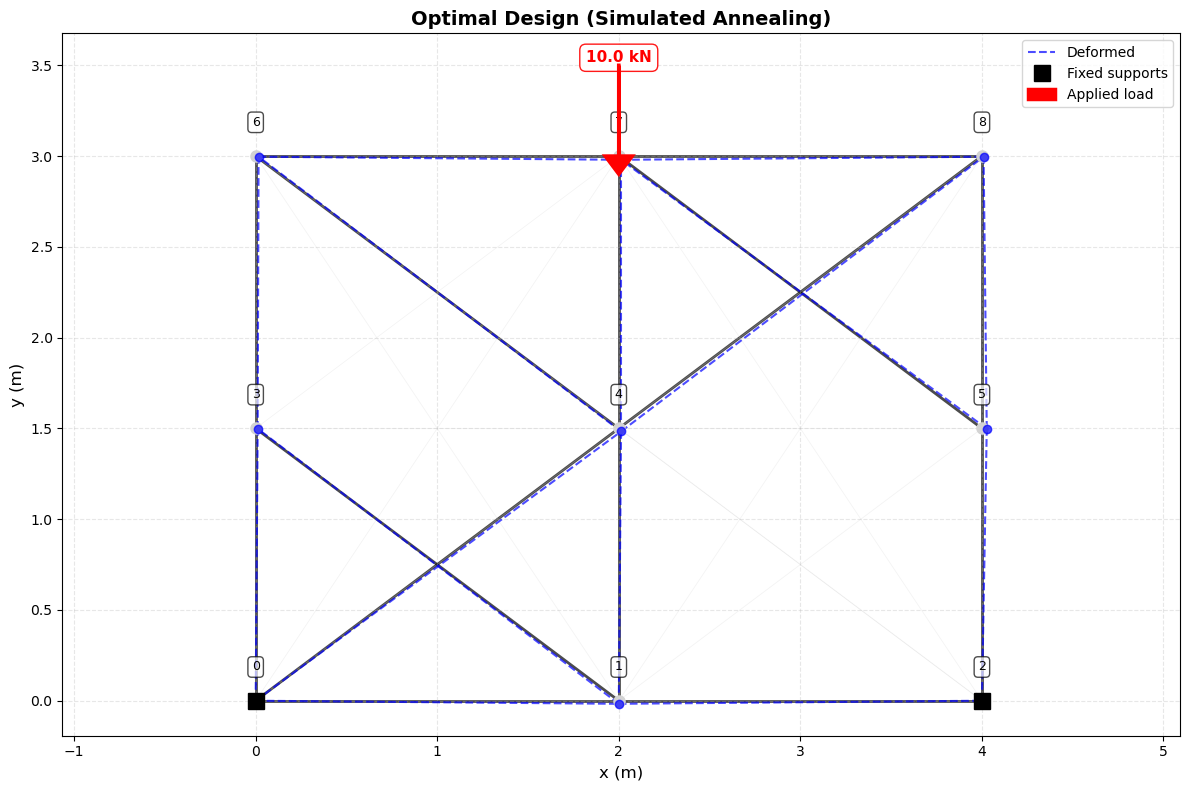

In [10]:
 
nodes = np.array([
    [0.0, 0.0], [2.0, 0.0], [4.0, 0.0],
    [0.0, 1.5], [2.0, 1.5], [4.0, 1.5],
    [0.0, 3.0], [2.0, 3.0], [4.0, 3.0]
])

elements = [
    (0, 1), (1, 2), (3, 4), (4, 5), (6, 7), (7, 8),  # Horizontal
    (0, 3), (3, 6), (1, 4), (4, 7), (2, 5), (5, 8),  # Vertical
    (0, 4), (1, 3), (1, 5), (2, 4), (3, 7), (4, 6), (4, 8), (5, 7),  # Diagonals
    (0, 8), (2, 6), (0, 7), (1, 6), (1, 8), (2, 7)   # Long diagonals
]

# Create FEM model
fem_model = TrussFEM(nodes, elements, E=200e9, A=0.001, rho=7850)

# Problem setup
fixed_dofs = [0, 1, 4, 5]
loads = np.zeros(2 * len(nodes))
loads[2*7 + 1] = -10000  # 10 kN downward at node 7

# Create QUBO optimizer
optimizer = TrussQUBOOptimizer(fem_model, loads, fixed_dofs)

# Method 1: Exact solver (only for small problems, N < 20)
if len(elements) <= 15:
    print("\n" + "="*60)
    print("METHOD 1: EXACT QUBO SOLVER")
    print("="*60)
    best_design, best_metrics, all_results = optimizer.solve_exact()
    
    if best_design is not None:
        u, _ = fem_model.solve(best_design, loads, fixed_dofs)
        fem_model.plot_truss(design=best_design, loads=loads, 
                            fixed_dofs=fixed_dofs, displacements=u, 
                            scale_factor=50, show_labels=True,
                            title="Optimal Design (Exact QUBO Solver)",
                            save_path="truss_qubo_exact.png")

# Method 2: Simulated Annealing (for larger problems)
print("\n" + "="*60)
print("METHOD 2: SIMULATED ANNEALING")
print("="*60)
best_design, best_metrics, history = optimizer.solve_annealing(
    num_reads=200,
    num_iterations=3
)

if best_design is not None:
    u, _ = fem_model.solve(best_design, loads, fixed_dofs)
    fem_model.plot_truss(design=best_design, loads=loads, 
                        fixed_dofs=fixed_dofs, displacements=u, 
                        scale_factor=50, show_labels=True,
                        title="Optimal Design (Simulated Annealing)",
                        save_path="truss_qubo_annealing.png")
    
    

## QUBO Box Solver
The Box algorithm to solve a linear system of equations.

## Example to illustrate the Box algorithm

$$ \mathbf {A} \mathbf {x} = \mathbf {b} $$


$$ \mathbf {A} =  \begin{bmatrix}
            6 & -6 & 0 & 0 & 0 \\
             -6 & 12 & -6 & 0 & 0 \\
            0 & -6 & 12 & -6 & 0 \\
            0 & 0 & -6 & 12 & -6 \\
             0 & 0 & 0 & -6 & 12 \\
            \end{bmatrix} $$
$$ \mathbf {b}  = \mathbf {A} \begin{pmatrix} \pi/3 \\ -1/2 \\ 1/3 \\ \pi/10 \\ 0.1 \\0.5 \end{pmatrix} $$


In [8]:

A = np.array([[6,-6,0,0,0,0],[-6,12,-6,0,0,0],[0,-6,12,-6,0,0],[0,0,-6,12,-6,0],
		      [0,0,0,-6,12,-6],[0,0,0,0,-6,12]])
xExact = np.array([np.pi/3,-1/2,1/3,-np.pi/10,0.1,0.5 ])
b = A.dot(xExact)

QB = QUBOBoxSolverClass(
	beta=0.5,
	LBox0=1,
	tol=1e-8,
	samplingMethod="simulatedAnnealing",
	nSamples=100,
	boxMaxIteration=100
	)

xSolution, LHistory1, nIterations, _, _, _, _ = QB.QUBOBoxSolve(A, b)
print("xExact:", xExact)
print("xSolution:", xSolution)
print("*" * 50)

xExact: [ 1.04719755 -0.5         0.33333333 -0.31415927  0.1         0.5       ]
xSolution: [ 1.04736328 -0.49975586  0.33349609 -0.31396484  0.10009766  0.5       ]
**************************************************
